In [1]:
import pandas as pd

# Ajuste o caminho para seu arquivo CSV (exemplo):
caminho = r"C:\Users\lcandido\Documents\Python Scripts\DADOS\amostra ccv entregas.csv"



In [2]:
# Carregar dados
df = pd.read_csv(caminho)

# Mostrar as primeiras linhas para verificar
df.head()


,Unnamed: 0,cod_pedido,cidade_destinatario,uf,grp_transportadora,dt_despacho_pedido,hr_despacho_pedido,dt_entrega_pedido,hr_entrega_pedido,dt_previsao_entrega_cliente,dt_criacao,dt_pagamento_pedido,flg_existem_ocorrencias,tp_praca,des_unidade_negocio,des_cd_origem,qtd_dias_tat,tp_performance_entrega
0,9297279,127995108-1,CURITIBA,PR,Transportadora 4,2023-12-04,05:56:39,2023-12-07,12:19:04,2023-12-07,2023-11-30,2023-11-30,Não,Capital,Multi,PR-Campina G. Sul,5.0,Entregue no Prazo
1,8745390,126433711-1,PARAUAPEBAS,PA,Transportadora 2,2023-11-21,12:39:55,2023-12-01,12:23:47,2023-12-11,2023-11-15,2023-11-17,Não,Interior,Mono,PR-Campina G. Sul,10.0,Entregue no Prazo
2,5434907,125177091-1,JACAREZINHO,PR,Transportadora 4,2023-10-28,10:12:24,2023-10-31,16:10:01,2023-11-06,2023-10-26,2023-10-27,Não,Interior,Mono,PR-Campina G. Sul,2.0,Entregue no Prazo
3,677778,123168303-1,SÃO PAULO,SP,Transportadora 5,2023-08-23,17:52:06,2023-08-24,12:00:13,2023-08-24,2023-08-22,2023-08-22,Não,Capital,Multi,PR-Campina G. Sul,2.0,Entregue no Prazo
4,3362848,122901808,SAO LUIS,MA,Transportadora 3,2023-08-14,08:41:00,2023-08-23,15:22:59,2023-08-24,2023-08-13,2023-08-12,não,Capital,Multi,PR-Campina G. Sul,8.0,Entregue no Prazo


In [4]:
# Importando bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [14]:
df["dt_despacho_pedido"] = pd.to_datetime(
    df["dt_despacho_pedido"] + " " + df["hr_despacho_pedido"],
    format="%Y-%m-%d %H:%M:%S"
)


In [15]:
df["dt_entrega_pedido"] = pd.to_datetime(
    df["dt_entrega_pedido"] + " " + df["hr_entrega_pedido"],
    format="%Y-%m-%d %H:%M:%S"
)


In [16]:
df["dt_previsao_entrega_cliente"] = pd.to_datetime(df["dt_previsao_entrega_cliente"])

In [17]:
df["dt_criacao"] = pd.to_datetime(df["dt_criacao"])

In [18]:
df["dt_pagamento_pedido"] = pd.to_datetime(df["dt_pagamento_pedido"])

In [19]:
df["flg_existem_ocorrencias"] = df["flg_existem_ocorrencias"].str.lower() == "sim"

In [20]:
df["entregue_no_prazo"] = df["tp_performance_entrega"] == "Entregue no Prazo"

In [21]:
df["qtde_dias_prazo_entrega"] = df["dt_previsao_entrega_cliente"] - df["dt_despacho_pedido"]

In [22]:
df["qtde_dias_efet_entrega"] = df["dt_entrega_pedido"] - df["dt_despacho_pedido"]

In [23]:
df = df.query("not dt_despacho_pedido.isnull() and not dt_entrega_pedido.isnull() and not dt_pagamento_pedido.isnull()")

df.drop(
    columns=[
        "Unnamed: 0",
        "hr_despacho_pedido",
        "hr_entrega_pedido",
        "tp_performance_entrega",
        "cod_pedido"
    ],
    inplace=True,
)

df

,cidade_destinatario,uf,grp_transportadora,dt_despacho_pedido,dt_entrega_pedido,dt_previsao_entrega_cliente,dt_criacao,dt_pagamento_pedido,flg_existem_ocorrencias,tp_praca,des_unidade_negocio,des_cd_origem,qtd_dias_tat,entregue_no_prazo,qtde_dias_prazo_entrega,qtde_dias_efet_entrega
0,CURITIBA,PR,Transportadora 4,2023-12-04 05:56:39,2023-12-07 12:19:04,2023-12-07,2023-11-30,2023-11-30,False,Capital,Multi,PR-Campina G. Sul,5.0,True,2 days 18:03:21,3 days 06:22:25
1,PARAUAPEBAS,PA,Transportadora 2,2023-11-21 12:39:55,2023-12-01 12:23:47,2023-12-11,2023-11-15,2023-11-17,False,Interior,Mono,PR-Campina G. Sul,10.0,True,19 days 11:20:05,9 days 23:43:52
2,JACAREZINHO,PR,Transportadora 4,2023-10-28 10:12:24,2023-10-31 16:10:01,2023-11-06,2023-10-26,2023-10-27,False,Interior,Mono,PR-Campina G. Sul,2.0,True,8 days 13:47:36,3 days 05:57:37
3,SÃO PAULO,SP,Transportadora 5,2023-08-23 17:52:06,2023-08-24 12:00:13,2023-08-24,2023-08-22,2023-08-22,False,Capital,Multi,PR-Campina G. Sul,2.0,True,0 days 06:07:54,0 days 18:08:07
4,SAO LUIS,MA,Transportadora 3,2023-08-14 08:41:00,2023-08-23 15:22:59,2023-08-24,2023-08-13,2023-08-12,False,Capital,Multi,PR-Campina G. Sul,8.0,True,9 days 15:19:00,9 days 06:41:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503523,BELO HORIZONTE,MG,Transportadora 3,2023-09-04 15:43:43,2023-09-07 10:33:03,2023-09-06,2023-09-03,2023-09-03,True,Capital,Multi,PR-Campina G. Sul,3.0,False,1 days 08:16:17,2 days 18:49:20
503525,SÃO PAULO,SP,Transportadora 5,2023-08-23 17:39:03,2023-08-26 12:30:53,2023-08-24,2023-08-22,2023-08-22,True,Capital,Multi,PR-Campina G. Sul,3.0,False,0 days 06:20:57,2 days 18:51:50
503526,São Paulo,SP,Transportadora 1,2023-09-19 15:09:15,2023-09-25 14:03:59,2023-09-20,2023-09-18,2023-09-16,True,Capital,Multi,SP-Jaguaré,6.0,False,0 days 08:50:45,5 days 22:54:44
503527,NITERÓI,RJ,Transportadora 3,2023-10-16 14:59:28,2023-10-19 14:56:27,2023-10-18,2023-10-14,2023-10-14,False,Reg. Metropolitana,Mono,SP-Registro,4.0,False,1 days 09:00:32,2 days 23:56:59


In [ ]:
#Entendimento entregas atrasadas sobre espaço temporal

In [25]:
!pip install hvplot


In [28]:
# Verifique os tipos das colunas
print(df[["dt_entrega_pedido", "entregue_no_prazo"]].dtypes)

# Confira se tem valores faltantes
print(df[["dt_entrega_pedido", "entregue_no_prazo"]].isnull().sum())

# Veja uma amostra dos dados nessas colunas
print(df[["dt_entrega_pedido", "entregue_no_prazo"]].head(10))

# Veja quantos valores únicos tem na coluna entregue_no_prazo
print(df["entregue_no_prazo"].value_counts())


dt_entrega_pedido    datetime64[ns]
entregue_no_prazo              bool
dtype: object
dt_entrega_pedido    0
entregue_no_prazo    0
dtype: int64
    dt_entrega_pedido  entregue_no_prazo
0 2023-12-07 12:19:04               True
1 2023-12-01 12:23:47               True
2 2023-10-31 16:10:01               True
3 2023-08-24 12:00:13               True
4 2023-08-23 15:22:59               True
5 2023-08-16 18:30:45               True
6 2023-11-28 16:09:02               True
7 2023-10-26 16:16:15               True
8 2023-08-05 08:25:59               True
9 2023-09-23 12:05:27               True
entregue_no_prazo
True     443343
False     17594
Name: count, dtype: int64


In [30]:
df_temp = df[["entregue_no_prazo", "dt_entrega_pedido"]].copy()
df_temp = df_temp.set_index("dt_entrega_pedido")

print(df_temp.head())
print(df_temp.index.min(), df_temp.index.max())


                     entregue_no_prazo
dt_entrega_pedido                     
2023-12-07 12:19:04               True
2023-12-01 12:23:47               True
2023-10-31 16:10:01               True
2023-08-24 12:00:13               True
2023-08-23 15:22:59               True
2023-07-01 00:00:00 2024-12-26 13:38:59


In [31]:
grupo = df_temp.groupby([pd.Grouper(freq='M'), 'entregue_no_prazo']).size().reset_index(name='counts')

print(grupo.head())


C:\Users\lcandido\AppData\Local\Temp\ipykernel_31948\173945265.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grupo = df_temp.groupby([pd.Grouper(freq='M'), 'entregue_no_prazo']).size().reset_index(name='counts')


  dt_entrega_pedido  entregue_no_prazo  counts
0        2023-07-31              False    2457
1        2023-07-31               True   60011
2        2023-08-31              False    1988
3        2023-08-31               True   64185
4        2023-09-30              False    2521


In [34]:
grupo["entregue_no_prazo"] = grupo["entregue_no_prazo"].astype(str)


In [35]:
import hvplot.pandas

grupo.hvplot.bar(
    x='dt_entrega_pedido',
    y='counts',
    by='entregue_no_prazo',
    title='Comparação Entregas no Prazo vs Fora do Prazo',
    xlabel='Mês',
    ylabel='Quantidade de Entregas',
    legend='top',
    width=1200,
    height=600
).opts(xrotation=45)


:Bars   [dt_entrega_pedido,entregue_no_prazo]   (counts)

In [36]:
import hvplot.pandas

(df.query("entregue_no_prazo == False")[["dt_entrega_pedido"]]
    .set_index("dt_entrega_pedido")
    .groupby(pd.Grouper(freq="ME"))
    .size()
    .hvplot.bar(
        title="Ocorrências Mensais de Atrasos",
        xlabel="Data",
        ylabel="Quantidade de Eventos",
        width=1200,
        height=600,
    )
)


:Bars   [dt_entrega_pedido]   (0)

In [37]:
import pandas as pd

# Caminho do seu arquivo CSV
caminho = r"C:\Users\lcandido\Documents\Python Scripts\DADOS\amostra ccv entregas.csv"

# Carregando o DataFrame
df = pd.read_csv(caminho)

# Conferindo as primeiras linhas só para confirmar que carregou
print(df.head())

# Listando as colunas
print(df.columns)


   Unnamed: 0   cod_pedido cidade_destinatario  uf grp_transportadora  \
0     9297279  127995108-1            CURITIBA  PR   Transportadora 4   
1     8745390  126433711-1         PARAUAPEBAS  PA   Transportadora 2   
2     5434907  125177091-1         JACAREZINHO  PR   Transportadora 4   
3      677778  123168303-1           SÃO PAULO  SP   Transportadora 5   
4     3362848    122901808            SAO LUIS  MA   Transportadora 3   

  dt_despacho_pedido hr_despacho_pedido dt_entrega_pedido hr_entrega_pedido  \
0         2023-12-04           05:56:39        2023-12-07          12:19:04   
1         2023-11-21           12:39:55        2023-12-01          12:23:47   
2         2023-10-28           10:12:24        2023-10-31          16:10:01   
3         2023-08-23           17:52:06        2023-08-24          12:00:13   
4         2023-08-14           08:41:00        2023-08-23          15:22:59   

  dt_previsao_entrega_cliente  dt_criacao dt_pagamento_pedido  \
0                  20

In [38]:
# Iniciar o teste de probalidade


# Criar coluna booleana atraso (True = atrasado)
df['atraso'] = df['tp_performance_entrega'] != 'Entregue no Prazo'



In [39]:
# Calcular percentual de atraso por transportadora
atraso_por_transportadora = df.groupby('grp_transportadora')['atraso'].mean() * 100


In [40]:
# Filtrar transportadoras com atraso > 70%
transportadoras_criticas = atraso_por_transportadora[atraso_por_transportadora > 70]

print(transportadoras_criticas)

Series([], Name: atraso, dtype: float64)


In [41]:
# Mostrar percentual de atraso por transportadora, ordenado do maior para menor
atraso_por_transportadora.sort_values(ascending=False)


grp_transportadora
Transportadora 5    13.184548
Transportadora 6     7.744108
Transportadora 2     6.975613
Transportadora 8     6.497623
Transportadora 7     5.888613
Transportadora 4     4.591129
Transportadora 3     4.445274
Transportadora 1     2.943619
Name: atraso, dtype: float64

In [42]:
#pedidos tem cada transportadora
df.groupby('grp_transportadora')['atraso'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)


,mean,count
grp_transportadora,,
Transportadora 5,0.131845,22314
Transportadora 6,0.077441,1188
Transportadora 2,0.069756,59622
Transportadora 8,0.064976,631
Transportadora 7,0.058886,2819
Transportadora 4,0.045911,89368
Transportadora 3,0.044453,107215
Transportadora 1,0.029436,220375


In [43]:
# Agrupar com taxa e contagem
df_agg = df.groupby('grp_transportadora')['atraso'].agg(['mean', 'count']).reset_index()

In [44]:
# Ajustar formato percentual
df_agg['mean'] = df_agg['mean'] * 100

In [45]:
# Renomear colunas para facilitar leitura
df_agg.columns = ['Transportadora', 'Taxa de Atraso (%)', 'Quantidade de Pedidos']

# Ordenar da maior para menor taxa de atraso
df_agg = df_agg.sort_values(by='Taxa de Atraso (%)', ascending=False)

print(df_agg)

     Transportadora  Taxa de Atraso (%)  Quantidade de Pedidos
4  Transportadora 5           13.184548                  22314
5  Transportadora 6            7.744108                   1188
1  Transportadora 2            6.975613                  59622
7  Transportadora 8            6.497623                    631
6  Transportadora 7            5.888613                   2819
3  Transportadora 4            4.591129                  89368
2  Transportadora 3            4.445274                 107215
0  Transportadora 1            2.943619                 220375


In [46]:
# Definindo gatilhos
gatilho_taxa_alta = 10
gatilho_taxa_media = 5
gatilho_volume = 5000

In [53]:
df_agg['Pedidos Atrasados'] = (df_agg['Taxa de Atraso (%)'] / 100) * df_agg['Quantidade de Pedidos']

# Ordenar para visualizar melhor
df_agg_sorted = df_agg.sort_values(by='Pedidos Atrasados', ascending=False)

print(df_agg_sorted[['Transportadora', 'Pedidos Atrasados', 'Quantidade de Pedidos', 'Taxa de Atraso (%)']])


     Transportadora  Pedidos Atrasados  Quantidade de Pedidos  \
0  Transportadora 1             6487.0                 220375   
2  Transportadora 3             4766.0                 107215   
1  Transportadora 2             4159.0                  59622   
3  Transportadora 4             4103.0                  89368   
4  Transportadora 5             2942.0                  22314   
6  Transportadora 7              166.0                   2819   
5  Transportadora 6               92.0                   1188   
7  Transportadora 8               41.0                    631   

   Taxa de Atraso (%)  
0            2.943619  
2            4.445274  
1            6.975613  
3            4.591129  
4           13.184548  
6            5.888613  
5            7.744108  
7            6.497623  


In [ ]:
#Transportadora 1 tem mais atrasos absolutos (6487), apesar de ter taxa menor (2,94%), porque opera em muito maior escala.

#Transportadora 5 tem a maior taxa (13,18%), mas menos atrasos absolutos (2942), por ter menos pedidos.

In [54]:
print(df_agg.columns)


Index(['Transportadora', 'Taxa de Atraso (%)', 'Quantidade de Pedidos',
       'Pedidos Atrasados'],
      dtype='object')


In [55]:
transportadoras_criticas = df_agg[
    (df_agg['Taxa de Atraso (%)'] > gatilho_taxa_alta) |
    ((df_agg['Taxa de Atraso (%)'] > gatilho_taxa_media) & (df_agg['Quantidade de Pedidos'] > gatilho_volume))
]


In [56]:
print(transportadoras_criticas)


     Transportadora  Taxa de Atraso (%)  Quantidade de Pedidos  \
4  Transportadora 5           13.184548                  22314   
1  Transportadora 2            6.975613                  59622   

   Pedidos Atrasados  
4             2942.0  
1             4159.0  


In [57]:
# 70% dos pedidos estiverem atrasados
# Nenhuma transportadora tem probabilidade tão alta, mas algumas têm acima de 10% (como a Transportadora 5), o que já pode ser um sinal de alerta.

In [58]:
# Agrupar por cidade e contar quantos pedidos tem em cada
entregas_por_cidade = df.groupby('cidade_destinatario').size().sort_values(ascending=False)



In [60]:
# Padronizar para maiúsculas sem espaços extras
df['cidade_destinatario'] = df['cidade_destinatario'].str.strip().str.upper()

# Recalcular a contagem por cidade
entregas_por_cidade = df.groupby('cidade_destinatario').size().sort_values(ascending=False)

# Mostrar as top 10 cidades
print(entregas_por_cidade.head(10))


cidade_destinatario
SÃO PAULO         64834
RIO DE JANEIRO    24665
BELO HORIZONTE    13490
BRASÍLIA          11549
CURITIBA          11180
PORTO ALEGRE       7963
SALVADOR           7767
FORTALEZA          6399
GUARULHOS          5387
CAMPINAS           5315
dtype: int64


In [61]:
import matplotlib.pyplot as plt

# Padronizar nomes das cidades para maiúsculas e sem espaços extras
df['cidade_destinatario'] = df['cidade_destinatario'].str.strip().str.upper()



In [62]:
# Recalcular contagem de entregas por cidade
entregas_por_cidade = df.groupby('cidade_destinatario').size().sort_values(ascending=False).head(10)



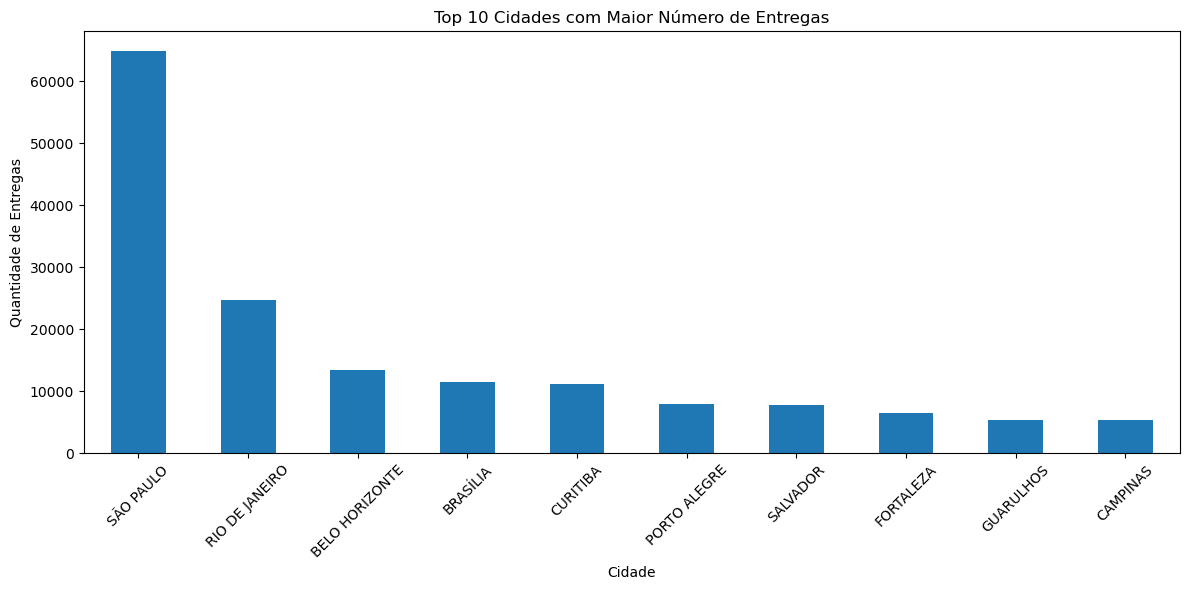

In [63]:
# Plotar gráfico de barras
plt.figure(figsize=(12,6))
entregas_por_cidade.plot(kind='bar')
plt.title('Top 10 Cidades com Maior Número de Entregas')
plt.xlabel('Cidade')
plt.ylabel('Quantidade de Entregas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [64]:
# Padronizar nomes das cidades (caso ainda não tenha feito)
df['cidade_destinatario'] = df['cidade_destinatario'].str.strip().str.upper()



In [65]:
# Criar coluna booleana de atraso (True se atrasado)
df['atraso'] = df['tp_performance_entrega'] != 'Entregue no Prazo'



In [66]:
# Calcular total de entregas e taxa de atraso por cidade
stats_cidades = df.groupby('cidade_destinatario').agg(
    total_entregas=('cod_pedido', 'count'),
    taxa_atraso=('atraso', 'mean')
).reset_index()

# Filtrar para as top 10 cidades por número de entregas
top_cidades = stats_cidades.sort_values(by='total_entregas', ascending=False).head(10)

# Converter taxa de atraso para percentual
top_cidades['taxa_atraso_percentual'] = top_cidades['taxa_atraso'] * 100

# Mostrar resultados
print(top_cidades[['cidade_destinatario', 'total_entregas', 'taxa_atraso_percentual']])


     cidade_destinatario  total_entregas  taxa_atraso_percentual
5850           SÃO PAULO           64834                5.435420
4852      RIO DE JANEIRO           24665                3.523211
670       BELO HORIZONTE           13490                8.650852
846             BRASÍLIA           11549                3.697290
1712            CURITIBA           11180                6.171735
4547        PORTO ALEGRE            7963                6.065553
4988            SALVADOR            7767                4.313120
2103           FORTALEZA            6399                3.016096
2348           GUARULHOS            5387                2.970113
1065            CAMPINAS            5315                2.634055


In [67]:
#Teste Qui-Quadrado (χ²)

#verificar se a taxa de atraso (atrasado vs no prazo) depende da cidade (ou outra categoria como transportadora).
#uma tabela de contingência (ex: cidades × status de entrega)
#O teste avalia se a distribuição do atraso é independente da cidade.

In [68]:
from scipy.stats import chi2_contingency

# Criar tabela de contingência: cidade vs atraso
contingency = pd.crosstab(df['cidade_destinatario'], df['atraso'])



In [69]:
# Rodar o teste
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi2: {chi2}, p-valor: {p}")



Chi2: 17618.91295852093, p-valor: 0.0


In [70]:
if p < 0.05:
    print("Existe associação significativa entre cidade e atraso.")
else:
    print("Não há evidência de associação entre cidade e atraso.")


Existe associação significativa entre cidade e atraso.


In [ ]:
# Resultado: hipótese nula de independência entre cidade e atraso.
#a taxa de atraso varia significativamente entre as cidades — algumas cidades têm atraso diferente de outras de forma estatisticamente significativa.


In [ ]:
# taxa de atraso varia significativamente entre as cidades — algumas cidades têm atraso diferente de outras de forma estatisticamente significativa.
#comparar os tempos de atraso (ou outra métrica contínua) entre duas cidades ou grupos de transportadoras.

#Testa se um grupo tende a ter valores maiores que o outro.

In [71]:
from scipy.stats import mannwhitneyu

# Suponha que você tenha o tempo de atraso (dias) na coluna 'qtd_dias_tat'
# E quer comparar entre duas cidades, ex: 'SAO PAULO' e 'RIO DE JANEIRO'

grupo1 = df[df['cidade_destinatario'] == 'SAO PAULO']['qtd_dias_tat'].dropna()
grupo2 = df[df['cidade_destinatario'] == 'RIO DE JANEIRO']['qtd_dias_tat'].dropna()


In [72]:
stat, p = mannwhitneyu(grupo1, grupo2, alternative='two-sided')

print(f"Estatística U: {stat}, p-valor: {p}")

if p < 0.05:
    print("Diferença significativa nos tempos de atraso entre as cidades.")
else:
    print("Nenhuma diferença significativa nos tempos de atraso entre as cidades.")

Estatística U: 11232888.0, p-valor: 0.0
Diferença significativa nos tempos de atraso entre as cidades.


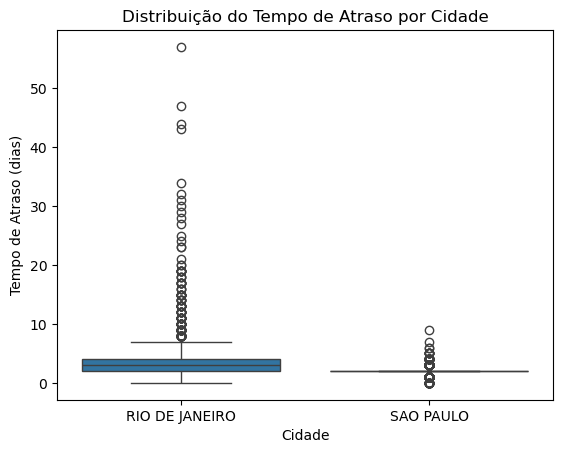

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='cidade_destinatario', y='qtd_dias_tat', data=df[df['cidade_destinatario'].isin(['SAO PAULO', 'RIO DE JANEIRO'])])
plt.title('Distribuição do Tempo de Atraso por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Tempo de Atraso (dias)')
plt.show()


In [ ]:
#os tempos de atraso em São Paulo e Rio de Janeiro não vêm da mesma distribuição, sugerindo que um deles tem atrasos consistentemente maiores ou menores.

In [ ]:
# Modelagem com dados temporais

In [74]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split



In [105]:
# Carregar dados (ajuste o caminho se necessário)
caminho = r"C:\Users\lcandido\Documents\Python Scripts\DADOS\amostra ccv entregas.csv"
df = pd.read_csv(caminho)



In [106]:
# Carregar dataset
df = pd.read_csv(caminho)


In [107]:
# Converter datas para datetime
df['dt_entrega_pedido'] = pd.to_datetime(df['dt_entrega_pedido'] + ' ' + df['hr_entrega_pedido'])
df['dt_pagamento_pedido'] = pd.to_datetime(df['dt_pagamento_pedido'])


In [108]:
# Criar variável alvo (atraso)
df['atraso'] = (df['tp_performance_entrega'] != 'Entregue no Prazo').astype(int)


In [109]:
# Features temporais
df['dia_semana'] = df['dt_entrega_pedido'].dt.dayofweek
df['mes'] = df['dt_entrega_pedido'].dt.month


In [110]:
# Intervalo pagamento-entrega
df['intervalo_pagto_entrega'] = (df['dt_entrega_pedido'] - df['dt_pagamento_pedido']).dt.days

In [111]:
# Codificar variáveis categóricas
df['grp_transportadora_code'] = df['grp_transportadora'].astype('category').cat.codes
df['cidade_code'] = df['cidade_destinatario'].str.upper().astype('category').cat.codes

In [112]:
# Remover linhas com dados faltantes em features importantes
df = df.dropna(subset=['intervalo_pagto_entrega'])

In [113]:
#Dividir em treino e teste com base no tempo

train = df[df['dt_entrega_pedido'] < '2024-01-01']
test = df[df['dt_entrega_pedido'] >= '2024-01-01']

In [114]:
features = ['dia_semana', 'mes', 'intervalo_pagto_entrega', 'grp_transportadora_code', 'cidade_code']

In [115]:
X_train = train[features]
y_train = train['atraso']

In [116]:
X_test = test[features]
y_test = test['atraso']

In [117]:

#Treinar o modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [118]:
#Avaliar o modelo

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7582
           1       0.16      0.20      0.18       382

    accuracy                           0.91      7964
   macro avg       0.56      0.57      0.56      7964
weighted avg       0.92      0.91      0.92      7964

[[7173  409]
 [ 306   76]]


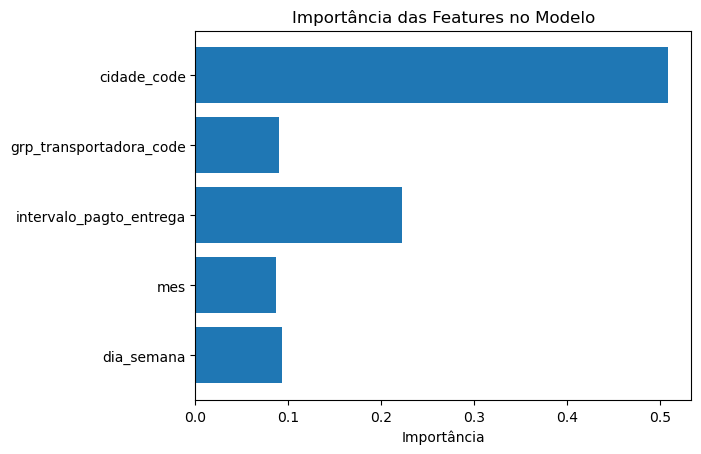

In [119]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(features, importances)
plt.xlabel('Importância')
plt.title('Importância das Features no Modelo')
plt.show()


In [120]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

# Salvar em arquivo .txt
with open('classification_report.txt', 'w') as f:
    f.write(report)


              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7582
           1       0.16      0.20      0.18       382

    accuracy                           0.91      7964
   macro avg       0.56      0.57      0.56      7964
weighted avg       0.92      0.91      0.92      7964



In [ ]:
#Precision	0.96	0.16	A precisão para "Sem atraso" é ótima (96%), mas para "Atraso" é baixa (16%). Ou seja, das previsões de atraso, só 16% são corretas.

#Recall	0.95	0.20	O modelo detecta 95% dos casos "Sem atraso", mas apenas 20% dos casos de atraso reais (baixa sensibilidade para atrasos).

#F1-score	0.95	0.18	Média ponderada entre precisão e recall; para atraso está bem baixa, refletindo dificuldade do modelo em identificar atrasos.

#Support	7582	382	Temos poucos exemplos de atraso (382), o que indica desbalanceamento na base.

In [ ]:
#Accuracy geral: 91%
#Com desbalanceamento forte (muito mais casos “sem atraso” que “atraso”), o modelo pode acertar muito ao prever "sem atraso" quase sempre e ainda assim ter baixa performance para detectar atrasos.

In [121]:
# Regressão Logística


import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [122]:

# Carregue e prepare df como antes (datas, atraso, features etc.)
# Exemplo simplificado (supondo df pronto e dividido em train/test):

features = ['dia_semana', 'mes', 'intervalo_pagto_entrega', 'grp_transportadora_code', 'cidade_code']




In [123]:

X_train = train[features]
y_train = train['atraso']

X_test = test[features]
y_test = test['atraso']


In [124]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [125]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7582
           1       0.50      0.33      0.40       382

    accuracy                           0.95      7964
   macro avg       0.73      0.66      0.69      7964
weighted avg       0.94      0.95      0.95      7964

[[7457  125]
 [ 256  126]]


In [126]:
import numpy as np

coef = model.coef_[0]
for feat, c in zip(features, coef):
    print(f"{feat}: {c:.4f} (odds ratio: {np.exp(c):.2f})")


dia_semana: 0.1814 (odds ratio: 1.20)
mes: -0.0461 (odds ratio: 0.95)
intervalo_pagto_entrega: 0.2087 (odds ratio: 1.23)
grp_transportadora_code: 0.3731 (odds ratio: 1.45)
cidade_code: 0.0000 (odds ratio: 1.00)


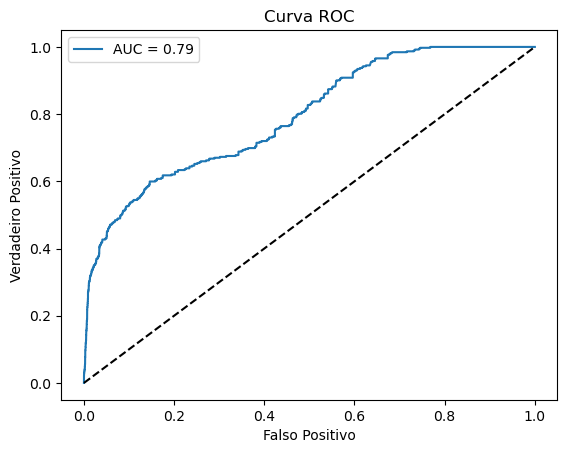

In [127]:
# definir o melhor grafico para analisar

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend()
plt.show()


In [ ]:

#Expectativa

#Avalia a capacidade do modelo em distinguir entre classes / Mostra o trade-off entre sensibilidade (recall) e especificidade.

#AUC (Área sob a curva) indica a qualidade geral (quanto mais perto de 1, melhor).

# Resultado 
#Isso indica que seu modelo tem uma boa capacidade discriminativa, conseguindo diferenciar bem entre atrasos e entregas no prazo.

#AUC perto de 0.8 é considerado um desempenho razoável para problemas reais.



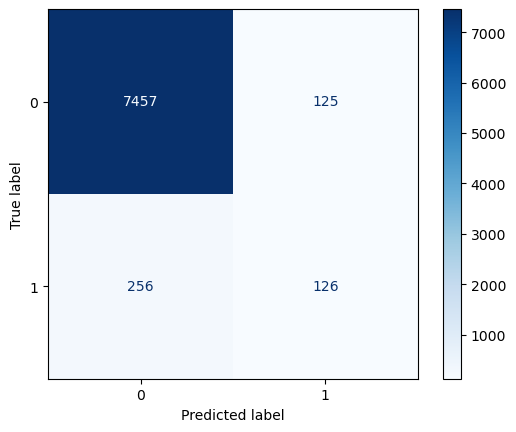

In [128]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.show()


In [ ]:
#Real No Atraso	7.457 (VN)	125 (FP)
#Real Atraso	256 (FN)	126 (VP)

#O modelo acertou bastante as entregas no prazo (7457).

#Para atrasos, acertou 126, mas errou 256 (ou seja, quase o dobro de atrasos não detectados).

#Também houve 125 falsos positivos (previu atraso mas não houve).


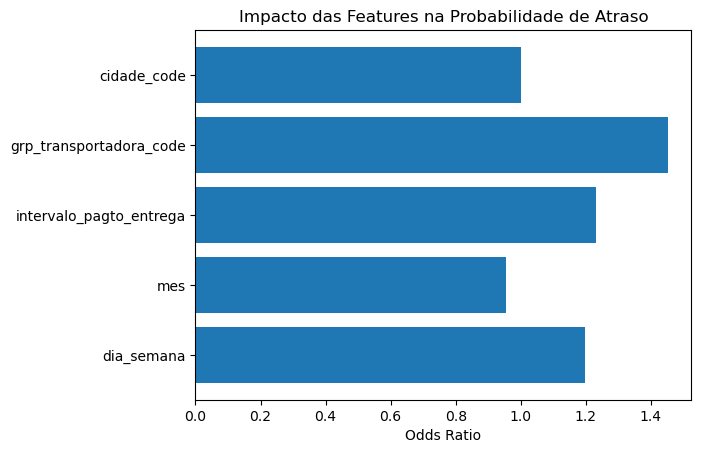

In [129]:
import numpy as np

coef = model.coef_[0]
features = ['dia_semana', 'mes', 'intervalo_pagto_entrega', 'grp_transportadora_code', 'cidade_code']
odds_ratios = np.exp(coef)

plt.barh(features, odds_ratios)
plt.xlabel('Odds Ratio')
plt.title('Impacto das Features na Probabilidade de Atraso')
plt.show()


In [ ]:



#| Feature                   | Odds Ratio | Interpretação                                                                       |
#| ------------------------- | ---------- | ----------------------------------------------------------------------------------- |
#| dia\_semana               | 1.1989     | Dias da semana com valor maior aumentam chance de atraso em \~20% por unidade.      |
#| mes                       | 0.9549     | Cada mês adicional reduz ligeiramente a chance de atraso (\~5%).                    |
#| intervalo\_pagto\_entrega | 1.2320     | Quanto maior o intervalo entre pagamento e entrega, maior chance de atraso (\~23%). |
#| grp\_transportadora\_code | 1.4522     | Transportadoras com código maior tendem a ter atraso mais frequente (\~45%).        |
#| cidade\_code              | 1.0000     | Nenhum efeito aparente no modelo para essa variável.                                |


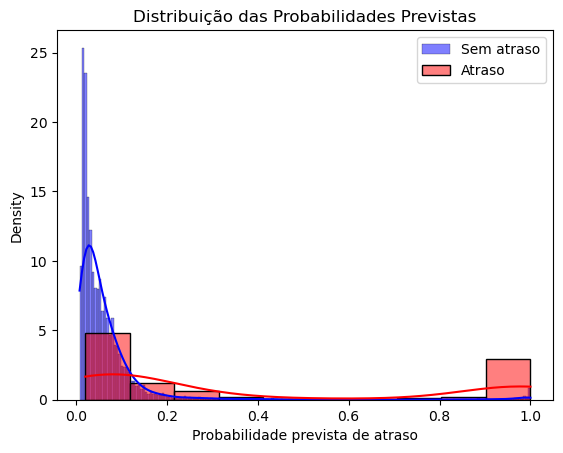

In [130]:
import seaborn as sns

y_prob = model.predict_proba(X_test)[:, 1]
sns.histplot(y_prob[y_test == 0], color='blue', label='Sem atraso', kde=True, stat='density')
sns.histplot(y_prob[y_test == 1], color='red', label='Atraso', kde=True, stat='density')
plt.xlabel('Probabilidade prevista de atraso')
plt.legend()
plt.title('Distribuição das Probabilidades Previstas')
plt.show()


In [ ]:
#Mostra a distribuição das probabilidades estimadas para atraso e não atraso.


#Para não atraso a média da probabilidade prevista foi ~7%, indicando o modelo é confiante nesses casos.

#Para atraso a média foi ~38%, mostrando que o modelo atribui probabilidades intermediárias e pode confundir casos.

#O desvio padrão maior para atraso indica maior dispersão, ou seja, incerteza maior nessas previsões.

In [132]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# 1. Calcular AUC e imprimir
y_prob = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.4f}")

# 2. Matriz de confusão e contagem de TP, FN, FP, TN
cm = confusion_matrix(y_test, model.predict(X_test))
tn, fp, fn, tp = cm.ravel()
print("Matriz de Confusão:")
print(cm)
print(f"Verdadeiros Positivos (TP): {tp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Verdadeiros Negativos (TN): {tn}")

# 3. Odds ratios (coeficientes da regressão logística)
features = ['dia_semana', 'mes', 'intervalo_pagto_entrega', 'grp_transportadora_code', 'cidade_code']
coef = model.coef_[0]
odds_ratios = np.exp(coef)
print("\nOdds Ratios por feature:")
for feat, oratio in zip(features, odds_ratios):
    print(f"{feat}: {oratio:.4f}")

# 4. Estatísticas simples da distribuição das probabilidades previstas
print("\nDistribuição das probabilidades previstas para cada classe:")
print(f"Probabilidades para classe 0 (sem atraso):")
print(f"  Média: {np.mean(y_prob[y_test == 0]):.4f}")
print(f"  Desvio padrão: {np.std(y_prob[y_test == 0]):.4f}")
print(f"Probabilidades para classe 1 (atraso):")
print(f"  Média: {np.mean(y_prob[y_test == 1]):.4f}")
print(f"  Desvio padrão: {np.std(y_prob[y_test == 1]):.4f}")


AUC: 0.7936
Matriz de Confusão:
[[7457  125]
 [ 256  126]]
Verdadeiros Positivos (TP): 126
Falsos Negativos (FN): 256
Falsos Positivos (FP): 125
Verdadeiros Negativos (TN): 7457

Odds Ratios por feature:
dia_semana: 1.1989
mes: 0.9549
intervalo_pagto_entrega: 1.2320
grp_transportadora_code: 1.4522
cidade_code: 1.0000

Distribuição das probabilidades previstas para cada classe:
Probabilidades para classe 0 (sem atraso):
  Média: 0.0692
  Desvio padrão: 0.1200
Probabilidades para classe 1 (atraso):
  Média: 0.3824
  Desvio padrão: 0.4106


In [ ]:
# Resultado da modelagem

#Comece com a Regressão Logística para explicar os fatores que causam os atrasos.

#Apresente Random Forest para mostrar como melhorar a precisão da previsão.

#Use Análise Estatística para justificar suas decisões, como a diferença entre as cidades.

In [ ]:
#"Implementar as melhorias sugeridas"

#Tratar o Desbalanceamento dos Dados ( (ex: "atraso") tem muito menos exemplos que a outra (ex: "sem atraso").)